Devem ser utilizados pelo menos os seguintes algoritmos: 1) K-Means, 2) DBSCAN; 3) Agglomerative Clustering. Utilize o ficheiro com o nome “segmentation data.csv” para realizar a sua análise. As principais conclusões que devem ser retiraram devem ter em consideração as seguintes dimensões:
* Número de perfis de clientes segmentados;
* Principais características dos clientes segmentados;
* Perfil dos clientes maioritários e minoritários / qual o perfil mais dominante e menos
dominante;
* Existem clusters bem separados ou onde a sua diferenciação não é tão clara?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# Carregar o conjunto de dados .csv
df = pd.read_csv('segmentation data.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

# Encoding

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Conversão de dados categóricos
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

O **LabelEncoder** é usado para transformar rótulos categóricos em valores numéricos inteiros, permitindo que esses rótulos sejam utilizados em algoritmos de machine learning que não aceitam dados categóricos diretamente.

In [6]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,0.44,38.85,60.56,50.20
std,57.88,0.50,13.97,26.26,25.82
min,1.00,0.00,18.00,15.00,1.00
25%,50.75,0.00,28.75,41.50,34.75
50%,100.50,0.00,36.00,61.50,50.00
75%,150.25,1.00,49.00,78.00,73.00
max,200.00,1.00,70.00,137.00,99.00


In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<Figure size 1600x1000 with 0 Axes>

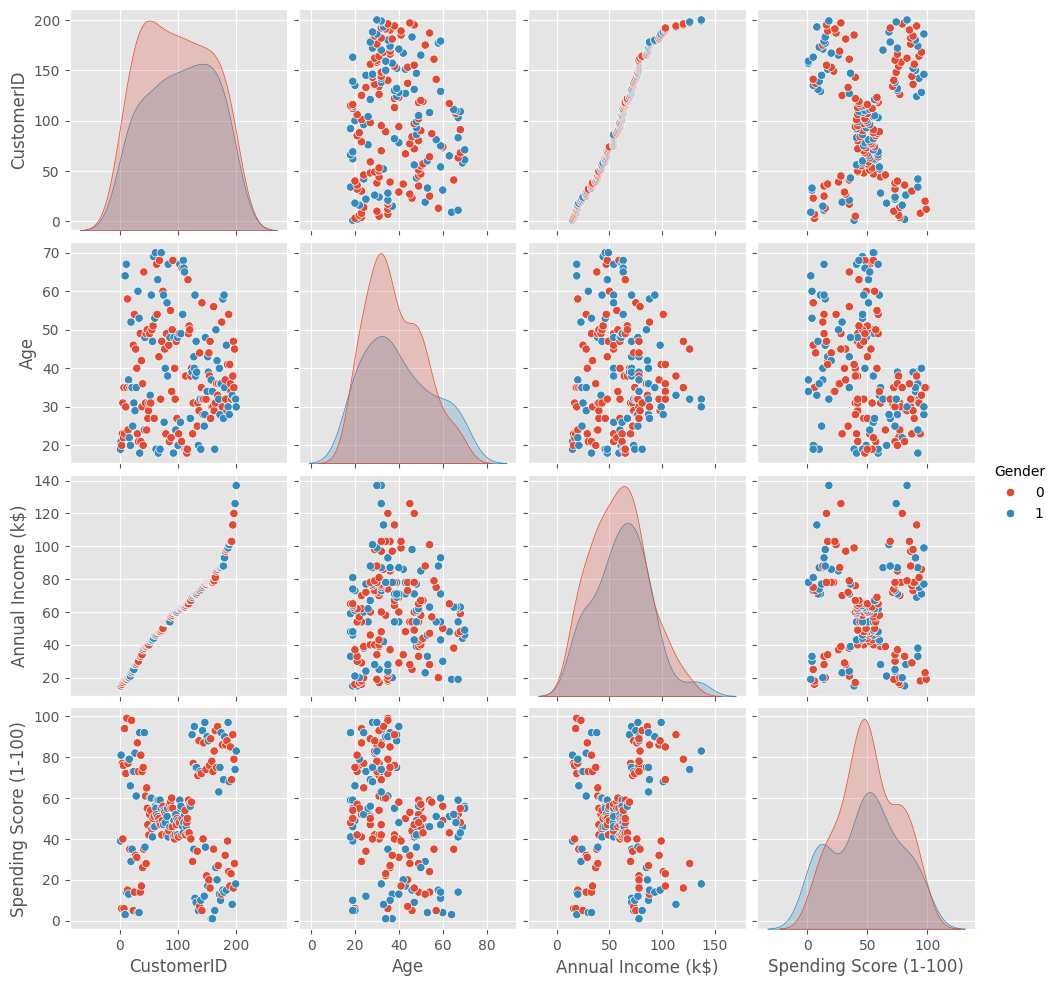

In [8]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

In [9]:
# Seleção das colunas desejadas
df_cluster = df[['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_cluster.head()

,Age,Gender,Annual Income (k$),Spending Score (1-100)
0,19,1,15,39
1,21,1,15,81
2,20,0,16,6
3,23,0,16,77
4,31,0,17,40


In [10]:
# Normalização dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

O **StandardScaler** é utilizado para padronizar as características dos dados, ajustando-os para ter média zero e desvio padrão um. Isso melhora a performance de algoritmos de machine learning que são sensíveis às escalas das características, como os baseados em distância (ex.: SVM, KNN) e aqueles que utilizam gradientes (ex.: regressão linear, redes neurais).

In [11]:
df_cluster.head().T

,0,1,2,3,4
Age,19,21,20,23,31
Gender,1,1,0,0,0
Annual Income (k$),15,15,16,16,17
Spending Score (1-100),39,81,6,77,40


# K-means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[800.0000000000001, 588.8026767824938, 476.78755441351586, 386.7147857740687, 325.10998348953433, 275.8588431130499, 236.20494707086885, 199.71662559667672, 174.19309570857683, 152.0867629871069]


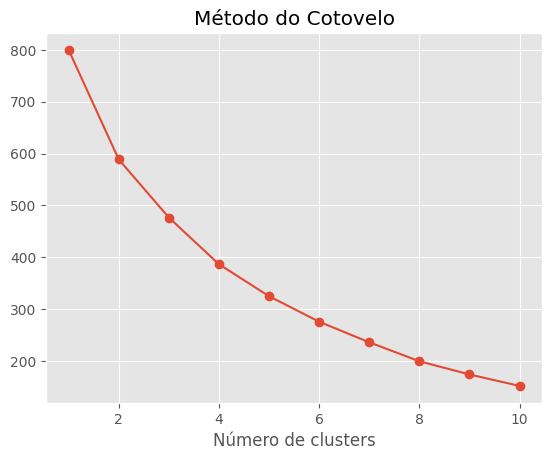

In [12]:
# Método do Cotovelo para determinar o número de clusters
lista = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    lista.append(kmeans.inertia_)

print(lista)

plt.plot(range(1, 11), lista, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.show()

In [13]:
n_clusters = 5

In [14]:
model_knn = KMeans(n_clusters, random_state=42)
clusters_kmeans = model_knn.fit_predict(df_scaled)
df['Cluster_KNN'] = clusters_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
X = df

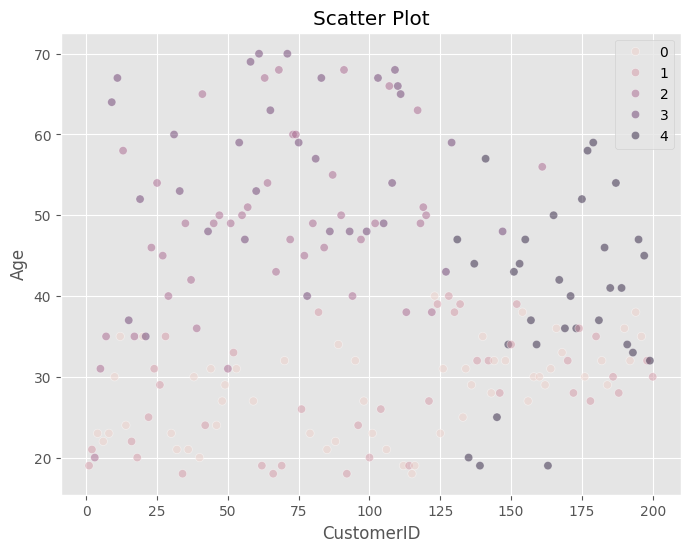

In [16]:
# Criar o scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 2], hue=model_knn.labels_, alpha=0.5)
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

In [17]:
df['label'] = model_knn.labels_

In [18]:
for i in range(5):
    print(f'Cluster : {i}')
    print(df[df.label == i].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

X = X.values

Cluster : 0
       CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
count       55.00   55.00 55.00               55.00                   55.00   
mean       102.85    0.00 28.35               60.80                   68.65   
min          4.00    0.00 18.00               16.00                   29.00   
max        196.00    0.00 40.00              120.00                   99.00   

       Cluster_KNN  
count        55.00  
mean          0.00  
min           0.00  
max           0.00  



Cluster : 1
       CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
count       40.00   40.00 40.00               40.00                   40.00   
mean       103.38    1.00 28.25               62.00                   71.67   
min          1.00    1.00 18.00               15.00                   39.00   
max        200.00    1.00 40.00              137.00                   97.00   

       Cluster_KNN  
count        40.00  
mean          1.00  
min          

# DBSCAN

In [19]:
from sklearn.cluster import DBSCAN

# Aplicar DBSCAN
model_dbscan = DBSCAN(eps=0.5, min_samples=n_clusters)
clusters_dbscan = model_dbscan.fit_predict(df_scaled)
df['Cluster DBSCAN'] = clusters_dbscan

In [20]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KNN,label,Cluster DBSCAN
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,100.50,0.44,38.85,60.56,50.20,1.72,1.72,1.38
std,57.88,0.50,13.97,26.26,25.82,1.42,1.42,2.96
min,1.00,0.00,18.00,15.00,1.00,0.00,0.00,-1.00
25%,50.75,0.00,28.75,41.50,34.75,0.00,0.00,-1.00
50%,100.50,0.00,36.00,61.50,50.00,2.00,2.00,-1.00
75%,150.25,1.00,49.00,78.00,73.00,3.00,3.00,3.00
max,200.00,1.00,70.00,137.00,99.00,4.00,4.00,8.00


In [21]:
# Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering

# Aplicar Agglomerative Clustering
model_agglo = AgglomerativeClustering(n_clusters=n_clusters)
clusters_agglo = model_agglo.fit_predict(df_scaled)
df['Cluster_Agglo'] = clusters_agglo

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.00,100.50,57.88,1.00,50.75,100.50,150.25,200.00
Gender,200.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
Age,200.00,38.85,13.97,18.00,28.75,36.00,49.00,70.00
Annual Income (k$),200.00,60.56,26.26,15.00,41.50,61.50,78.00,137.00
Spending Score (1-100),200.00,50.20,25.82,1.00,34.75,50.00,73.00,99.00
Cluster_KNN,200.00,1.72,1.42,0.00,0.00,2.00,3.00,4.00
label,200.00,1.72,1.42,0.00,0.00,2.00,3.00,4.00
Cluster DBSCAN,200.00,1.38,2.96,-1.00,-1.00,-1.00,3.00,8.00
Cluster_Agglo,200.00,1.68,1.45,0.00,0.00,1.50,3.00,4.00


Análise

* Número de perfis de clientes segmentados;
* Principais características dos clientes segmentados;
* Perfil dos clientes maioritários e minoritários / qual o perfil mais dominante e menos
dominante;
* Existem clusters bem separados ou onde a sua diferenciação não é tão clara?

In [23]:
# Análise descritiva dos clusters
def cluster_analysis(data, cluster_label):
    clusters = data.groupby(cluster_label).mean()
    counts = data[cluster_label].value_counts()
    return clusters, counts

# K-Means
clusters_kmeans, counts_kmeans = cluster_analysis(df, 'Cluster_KNN')
print("K-Means Clusters:\n", clusters_kmeans)
print("\nCluster Counts:\n", counts_kmeans)

# DBSCAN
clusters_dbscan, counts_dbscan = cluster_analysis(df, 'Cluster DBSCAN')
print("\nDBSCAN Clusters:\n", clusters_dbscan)
print("\nCluster Counts:\n", counts_dbscan)

# Agglomerative Clustering
clusters_agglo, counts_agglo = cluster_analysis(df, 'Cluster_Agglo')
print("\nAgglomerative Clustering Clusters:\n", clusters_agglo)
print("\nCluster Counts:\n", counts_agglo)


K-Means Clusters:
              CustomerID  Gender   Age  Annual Income (k$)  \
Cluster_KNN                                                 
0                102.85    0.00 28.35               60.80   
1                103.38    1.00 28.25               62.00   
2                 66.65    0.00 48.72               46.19   
3                 72.61    1.00 55.90               48.77   
4                167.45    0.55 40.42               90.00   

             Spending Score (1-100)  label  Cluster DBSCAN  Cluster_Agglo  
Cluster_KNN                                                                
0                             68.65   0.00            2.80           0.38  
1                             71.67   1.00            1.65           0.55  
2                             39.67   2.00            0.35           2.70  
3                             38.81   3.00            2.32           3.68  
4                             15.74   4.00           -1.00           2.00  

Cluster Counts:
 Clu

Análise de perfil maioritários e minoritários. Verificação de dominância.

**K-Means:**

Cluster Dominante: Cluster 0 (55 clientes)

Cluster Menos Dominante: Clusters 3 e 4 (31 clientes cada)

**Agglomerative Clustering:**

Cluster Dominante: Cluster 0 (61 clientes)

Cluster Menos Dominante: Cluster 4 (29 clientes)

**DBSCAN:**

Cluster Dominante: Cluster -1 (Outlier, 105 clientes)

Cluster Menos Dominante: Cluster 6 (4 clientes)

# PARTE 2 - Collaborative Filtering

escolha 3 utilizadores e faça a sugestão de um top 5 de anedotas por utilizador. Tenham em consideração que os utilizadores escolhidos devem ter gostos por tipos de anedotas diferentes. Justifiquem a escolha dos utilizadores.
Desta maneira será possível avaliar se as anedotas sugeridas realmente foram bem-sucedidas.
Adicionalmente, descrevam a abordagem escolhida para recomendação de anedotas e justifiquem o porquê dessa abordagem ser a melhor neste contexto.

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
df_items = pd.read_csv('items.csv')
df_ratings = pd.read_csv('/content/drive/MyDrive/data/ratings.csv')

In [74]:
df_items.head()

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...


In [75]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   jokeId    150 non-null    int64 
 1   jokeText  150 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [76]:
df_ratings.head()

,userId,jokeId,rating
0,1,5,0.22
1,1,7,-9.28
2,1,8,-9.28
3,1,13,-6.78
4,1,15,0.88


In [77]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761439 entries, 0 to 1761438
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   userId  int64  
 1   jokeId  int64  
 2   rating  float64
dtypes: float64(1), int64(2)
memory usage: 40.3 MB


In [78]:
df_ratings.isna().sum()

userId    0
jokeId    0
rating    0
dtype: int64

In [79]:
df_ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
userId,"1,761,439.00","32,723.22","18,280.11",1.00,"17,202.00","34,808.00","47,306.00","63,978.00"
jokeId,"1,761,439.00",70.71,46.01,5.00,21.00,69.00,112.00,150.00
rating,"1,761,439.00",1.62,5.30,-10.00,-2.03,2.22,5.72,10.00


In [80]:
# Perfil 1: Prefere anedotas com classificações positivas altas (7 a 10)
perfil_1 = df_ratings[df_ratings['rating'] >= 7]['userId'].mode()[0]

# Perfil 2: Prefere anedotas com classificações mistas (tanto positivas quanto negativas)
perfil_2 = df_ratings[(df_ratings['rating'] >= -3) & (df_ratings['rating'] <= 3)]['userId'].mode()[0]

# Perfil 3: Prefere anedotas com classificações negativas (-10 a -7)
perfil_3 = df_ratings[df_ratings['rating'] <= -7]['userId'].mode()[0]

In [81]:
perfil_1

6112

In [82]:
perfil_2

14060

In [83]:
perfil_3

937

In [84]:
%pip install surprise

In [85]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# preparaçao dos dados para a biblioteca Surprise
# Usado -10 e 10 pois são os menores e maiores valores do ratings
reader = Reader(rating_scale=(-10, 10))
data = Dataset.load_from_df(df_ratings[['userId', 'jokeId', 'rating']], reader)

# Dividir os dados em conjunto de treino e teste
trainset, testset = train_test_split(data, test_size=0.25)

# Treinamento do modelo SVD
svd = SVD()
svd.fit(trainset)

# Avaliação do modelo
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 4.4776


4.477553938073797

# Cross_validate e GridSearchCV

In [86]:
from surprise.model_selection import cross_validate, GridSearchCV

# carregar os dados
reader = Reader(rating_scale=(-10, 10))
data = Dataset.load_from_df(df_ratings[['userId', 'jokeId', 'rating']], reader)

# definir os parâmetros para o GridSearch
param_grid = {
    'n_factors': [20, 50, 100],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.05, 0.1]
}

# realizar o GridSearchCV
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5, n_jobs=-1)
gs.fit(data)

print("Melhores parâmetros:", gs.best_params['rmse'])
print("Melhor RMSE:", gs.best_score['rmse'])

Melhores parâmetros: {'n_factors': 100, 'lr_all': 0.002, 'reg_all': 0.1}
Melhor RMSE: 4.176097130665058


In [87]:
# treinamento do modelo SVD com os melhores hiperparâmetros
best_svd = gs.best_estimator['rmse']
trainset = data.build_full_trainset()
best_svd.fit(trainset)

# prever as classificaçoes e calcular o RMSE no conjunto de testes
testset = trainset.build_testset()
predictions = best_svd.test(testset)
accuracy.rmse(predictions)

RMSE: 2.6691


2.6691107333704243

# Recomendações

In [88]:
def df_top_recomendacoes(perfil, top=5):
    # listar todas as anedotas unicas
    all_jokes = df_ratings['jokeId'].unique()

    # listar as anedotas que nao foram avaliadas
    user_ratings = df_ratings[df_ratings['userId'] == perfil]
    user_jokes = user_ratings['jokeId'].unique()
    jokes_to_predict = [joke for joke in all_jokes if joke not in user_jokes]

    # prever as anedotas nao avaliadas
    predictions = [best_svd.predict(perfil, joke_id) for joke_id in jokes_to_predict]

    # listar as top 5 por perfil
    top_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:top]

    # retornar as recomendaçoes
    top_jokes = [(pred.iid, pred.est) for pred in top_predictions]
    return top_jokes

# gerar recomendaçoes para os perfils
recomendacoes_perfil1 = df_top_recomendacoes(perfil_1)
recomendacoes_perfil2 = df_top_recomendacoes(perfil_2)
recomendacoes_perfil3 = df_top_recomendacoes(perfil_3)

In [89]:
print('Perfil 1')
recomendacoes_perfil1

Perfil 1


[(61, 10),
 (73, 10),
 (43, 9.801667204662799),
 (80, 9.718485794625355),
 (27, 9.629759252591425)]

In [90]:
print('Perfil 2')
recomendacoes_perfil2

Perfil 2


[(20, 0.9561411903510408),
 (100, 0.8235154049386083),
 (43, 0.6878668969491191),
 (27, 0.6015745543436555),
 (73, 0.47183679204859663)]

In [91]:
print('Perfil 3')
recomendacoes_perfil3

Perfil 3


[(5, -5.641160623765691),
 (100, -6.993669988167291),
 (27, -8.108223235808378),
 (52, -8.411222931925133),
 (20, -8.444582878391385)]

In [92]:
def df_link_recomendacoes_itens(recomendacoes):
    lista_jokes = []
    for joke_id, rating in recomendacoes:
        joke_text = df_items[df_items['jokeId'] == joke_id]['jokeText'].values[0]
        lista_jokes.append((joke_id, joke_text, rating))
    return lista_jokes

# Mapear e exibir as anedotas recomendadas
item_recomendacoes_perfil1 = df_link_recomendacoes_itens(recomendacoes_perfil1)
item_recomendacoes_perfil2 = df_link_recomendacoes_itens(recomendacoes_perfil2)
item_recomendacoes_perfil3 = df_link_recomendacoes_itens(recomendacoes_perfil3)

In [93]:
print('Perfil 1:')
item_recomendacoes_perfil1

Perfil 1:


[(61,
  'During a recent publicity outing, Hillary sneaked off to visit a\nfortune teller of some local repute.  In a dark and hazy room, peering\ninto a crystal ball, the mystic delivered grave news.\n"There\'s no easy way to say this, so I\'ll just be blunt: Prepare\nyourself to be a widow.  Your husband will die a violent and horrible\ndeath this year."\nVisibly shaken, Hillary stared at the woman\'s lined face, then at \nthe single flickering candle, then down at her hands.  She took a few \ndeep breaths to compose herself.  She simply had to know.  She met the\nfortune teller\'s gaze, steadied her voice, and asked her question.\n"Will I be acquitted?"\n',
  10),
 (73,
  "Q: What is the difference between George  Washington, Richard Nixon,\nand Bill Clinton?\n\nA: Washington couldn't tell a lie, Nixon couldn't   tell the truth, and\nClinton doesn't know the difference.\n",
  10),
 (43,
  'Arnold Swartzeneger and Sylvester Stallone are making a movie about\nthe lives of the great co

In [94]:
print('Perfil 2:')
item_recomendacoes_perfil2

Perfil 2:


[(20,
  "What's the difference between a MacIntosh and an\nEtch-A-Sketch? \n\nYou don't have to shake the Mac to clear the screen. \n",
  0.9561411903510408),
 (100,
  'Q: Whats the difference between greeting a Queen and greeting the\nPresident of the United  States?\n\nA: You only have to get on one knee to greet the queen.\n',
  0.8235154049386083),
 (43,
  'Arnold Swartzeneger and Sylvester Stallone are making a movie about\nthe lives of the great composers.  \nStallone says "I want to be Mozart." \nSwartzeneger says: "In that case...  I\'ll be Bach."\n',
  0.6878668969491191),
 (27,
  'Clinton returns from a vacation in Arkansas and walks down  the\nsteps of Air Force One with two pigs under his arms.  At the bottom\nof the steps, he says  to the honor guardsman, "These are genuine\nArkansas Razor-Back Hogs.  I got this one for Chelsea and this one for\nHillary."  \n\nThe guardsman replies, "Nice trade, Sir."\n',
  0.6015745543436555),
 (73,
  "Q: What is the difference between Ge

In [95]:
print('Perfil 3:')
item_recomendacoes_perfil3

Perfil 3:


[(5,
  "Q.\tWhat's O. J. Simpson's Internet address? \nA.\tSlash, slash, backslash, slash, slash, escape.\n",
  -5.641160623765691),
 (100,
  'Q: Whats the difference between greeting a Queen and greeting the\nPresident of the United  States?\n\nA: You only have to get on one knee to greet the queen.\n',
  -6.993669988167291),
 (27,
  'Clinton returns from a vacation in Arkansas and walks down  the\nsteps of Air Force One with two pigs under his arms.  At the bottom\nof the steps, he says  to the honor guardsman, "These are genuine\nArkansas Razor-Back Hogs.  I got this one for Chelsea and this one for\nHillary."  \n\nThe guardsman replies, "Nice trade, Sir."\n',
  -8.108223235808378),
 (52,
  'Q: What do Monica Lewinsky and Bob Dole have in common?\nA: They were both upset when Bill finished first.\n',
  -8.411222931925133),
 (20,
  "What's the difference between a MacIntosh and an\nEtch-A-Sketch? \n\nYou don't have to shake the Mac to clear the screen. \n",
  -8.444582878391385)]

**Cross-Validate**: Avalia a performance do modelo de forma robusta usando validação cruzada.

**GridSearchCV**: Otimiza os hiperparâmetros do modelo usando validação cruzada para encontrar a melhor combinação de parâmetros.

Ambos os métodos ajudam a melhorar a confiabilidade e a performance dos modelos de machine learning, garantindo que eles generalizem bem para novos dados.

A biblioteca *Surprise* é exelente para fazer as recomendações, já que é uma biblioteca indicada para sistemas de recomendações

Com o modelo surprise, tive um RMSE de **4.47**, aplicando testes de hiperparâmetros, consegui um valor de **2.66**, obtendo uma melhora significativa

o metodo **SVD** que permite fazer a avaliação das matrizes entre as anetodas e os itens.
